In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fyp/Datasets/updated_dataset1.csv')
df.head()

,Fever,High_fever,severe_headache,pain_behind_eyes,joint_and_muscle_pain,Nausea,vomiting,swollen_glands,rash,Runny_nose,...,Chest_pain,Confusion(older adults),persistent_cough,wheezing,chest_tightness,loss_of_scent,loss_of_taste,Mild_pneumonia,Fatigue,Type
0,Yes,No,No,No,Yes,No,No,No,No,No,...,No,No,No,No,No,No,Yes,No,No,COVID
1,Yes,Yes,No,No,Yes,No,No,No,No,No,...,No,No,No,No,No,No,Yes,No,Yes,COVID
2,No,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,COVID
3,No,No,No,No,Yes,Yes,No,No,No,No,...,No,No,No,No,No,No,Yes,No,Yes,COVID
4,Yes,Yes,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,COVID


In [ ]:
#Encoding
categorical_columns = df.columns[:-1]
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print("Encoded DataFrame:\n", df.head())

Encoded DataFrame:
    Fever  High_fever  severe_headache  pain_behind_eyes  \
0      1           0                0                 0   
1      1           1                0                 0   
2      0           0                0                 0   
3      0           0                0                 0   
4      1           1                0                 0   

   joint_and_muscle_pain  Nausea  vomiting  swollen_glands  rash  Runny_nose  \
0                      1       0         0               0     0           0   
1                      1       0         0               0     0           0   
2                      0       1         0               0     0           0   
3                      1       1         0               0     0           0   
4                      0       0         0               0     0           0   

   ...  Chest_pain  Confusion(older adults)  persistent_cough  wheezing  \
0  ...           0                        0                 0        

In [ ]:
#K-Fold Cross-Validation Splitting
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)
X = df.drop('Type', axis=1)
y = df['Type']

fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("X_train:\n", X_train)
    print("X_test:\n", X_test)
    print("y_train:\n", y_train)
    print("y_test:\n", y_test)

    fold += 1

Fold 1
X_train:
       Fever  High_fever  severe_headache  pain_behind_eyes  \
0         1           0                0                 0   
3         0           0                0                 0   
5         0           0                0                 0   
6         1           1                0                 0   
7         1           1                0                 0   
...     ...         ...              ...               ...   
3493      0           0                0                 0   
3494      0           0                0                 0   
3496      0           0                0                 0   
3497      0           0                0                 0   
3498      0           0                0                 0   

      joint_and_muscle_pain  Nausea  vomiting  swollen_glands  rash  \
0                         1       0         0               0     0   
3                         1       1         0               0     0   
5                        

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


<Figure size 1500x1000 with 0 Axes>

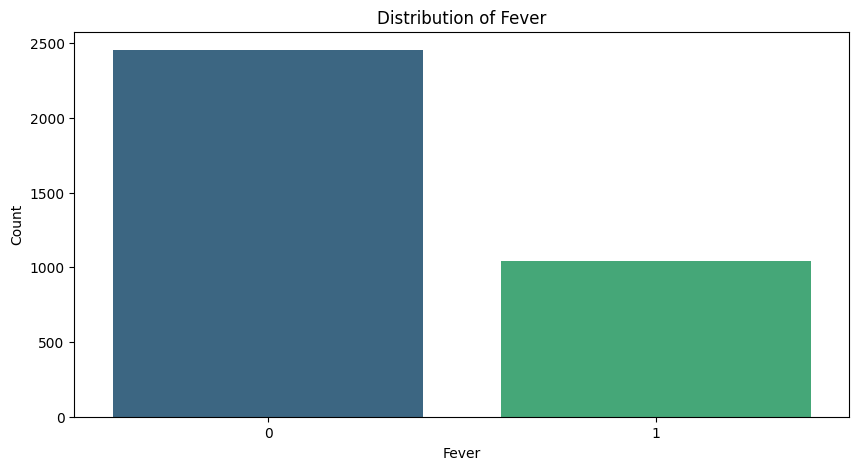

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


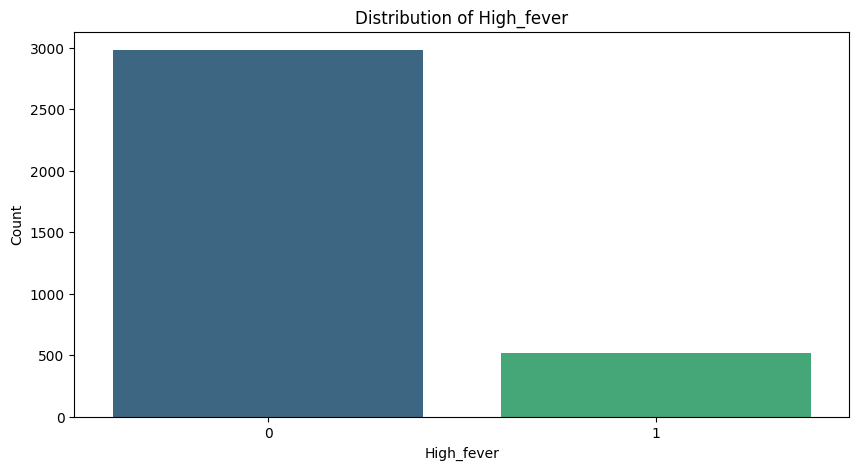

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


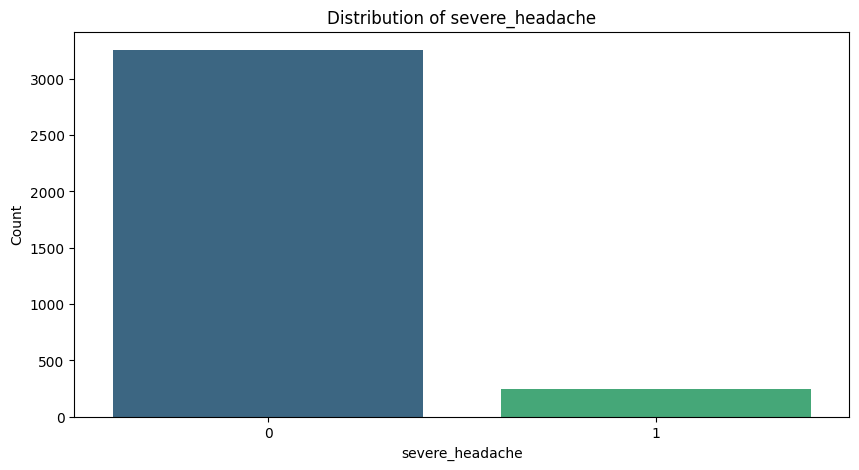

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


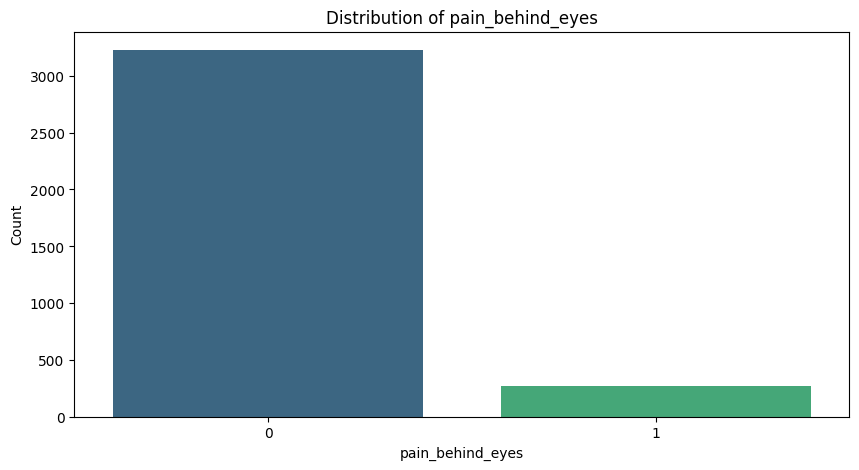

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


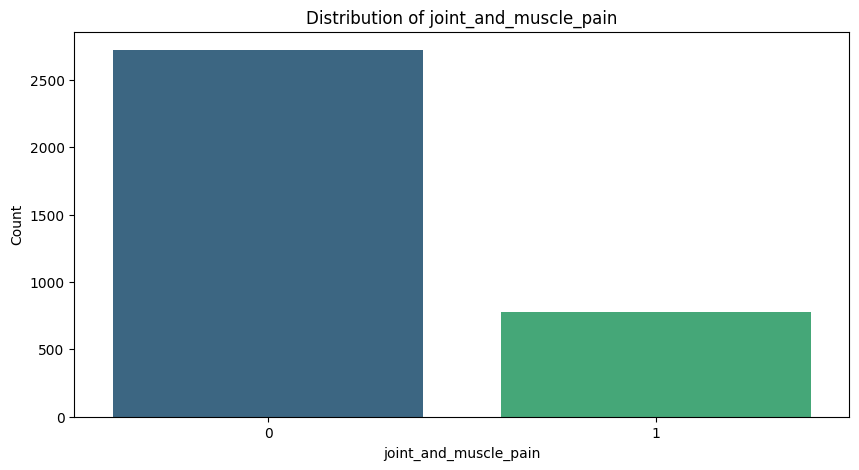

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


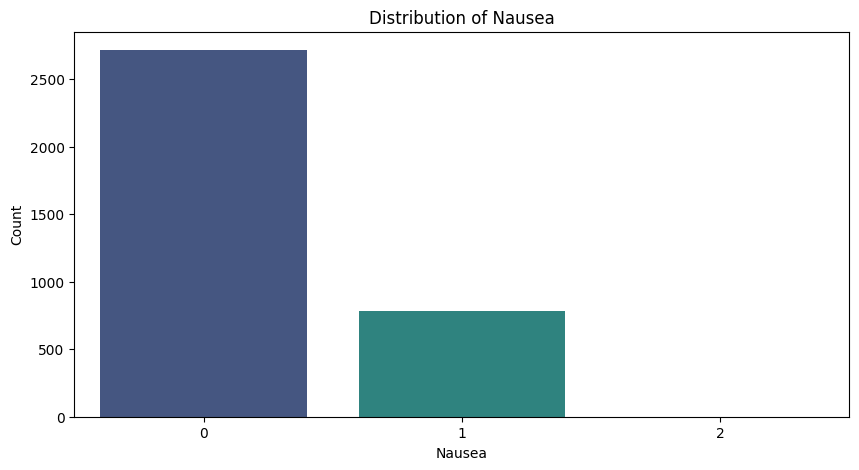

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


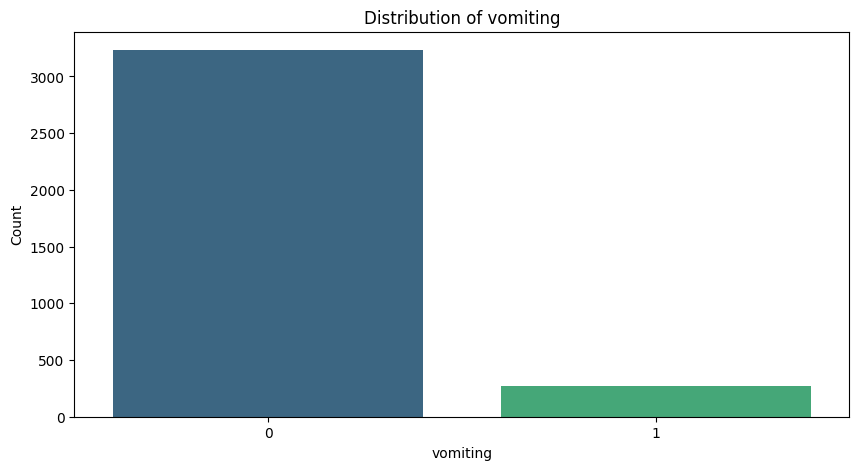

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


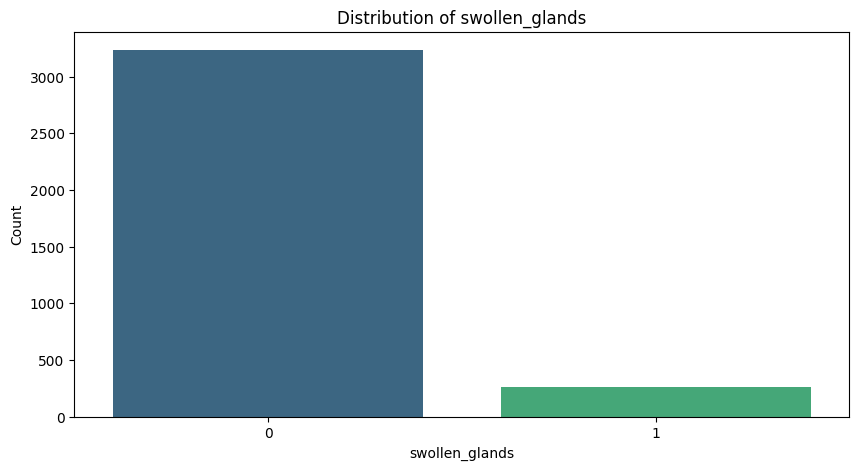

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


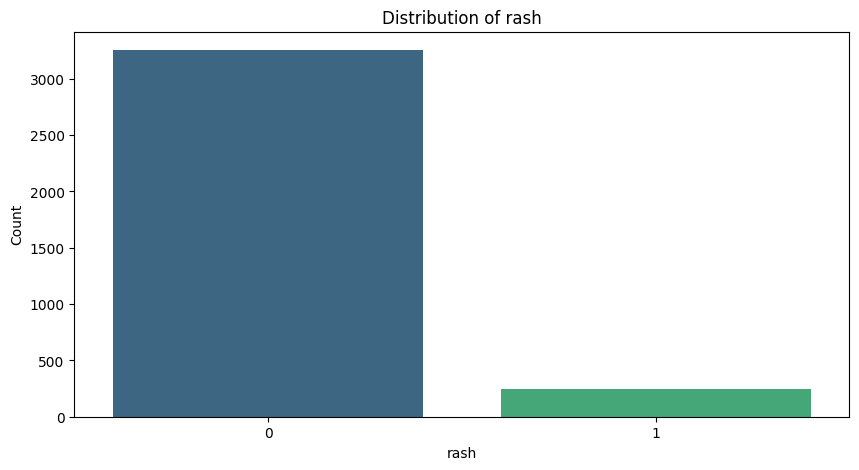

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


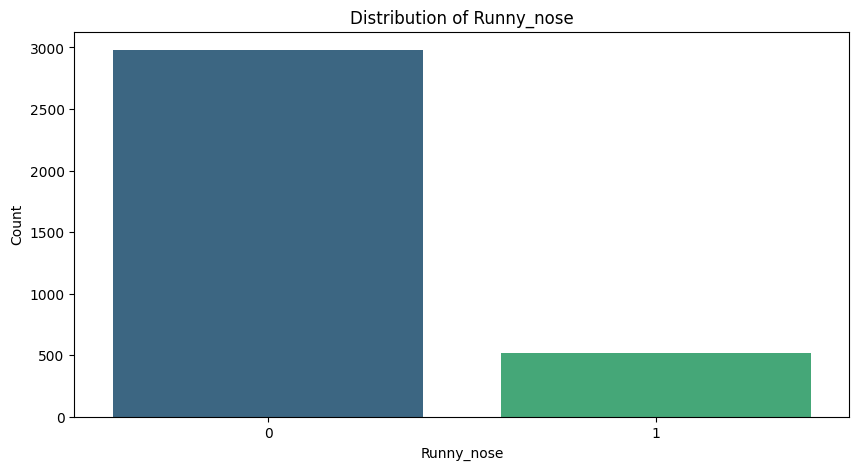

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


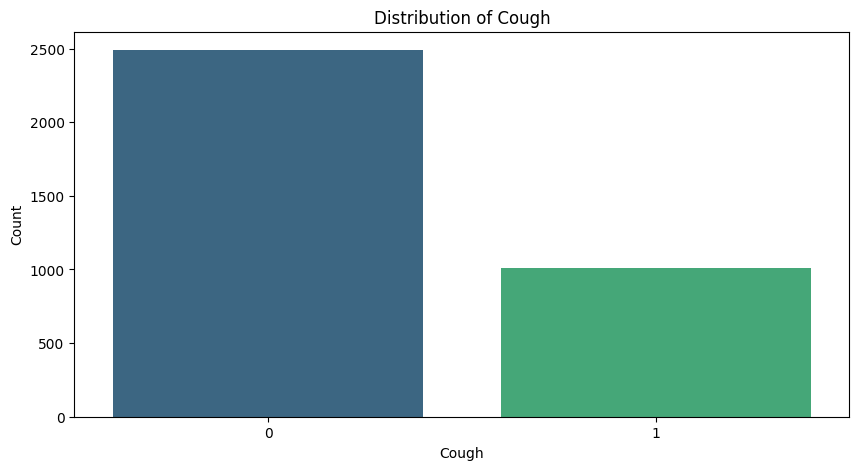

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


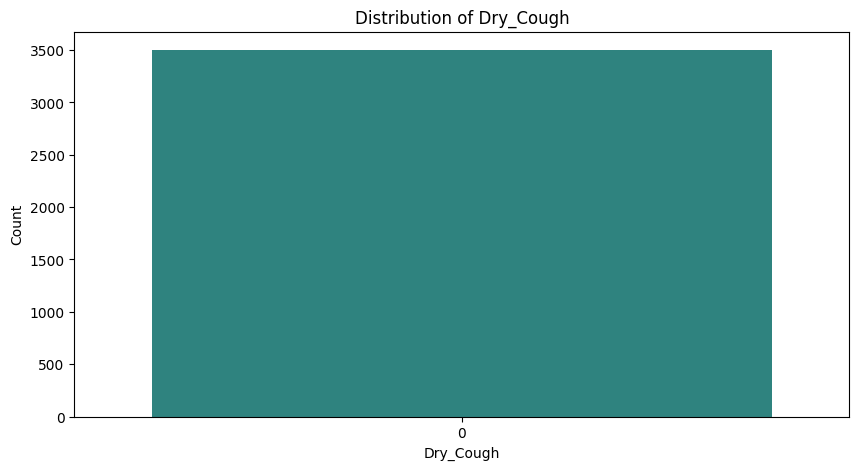

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


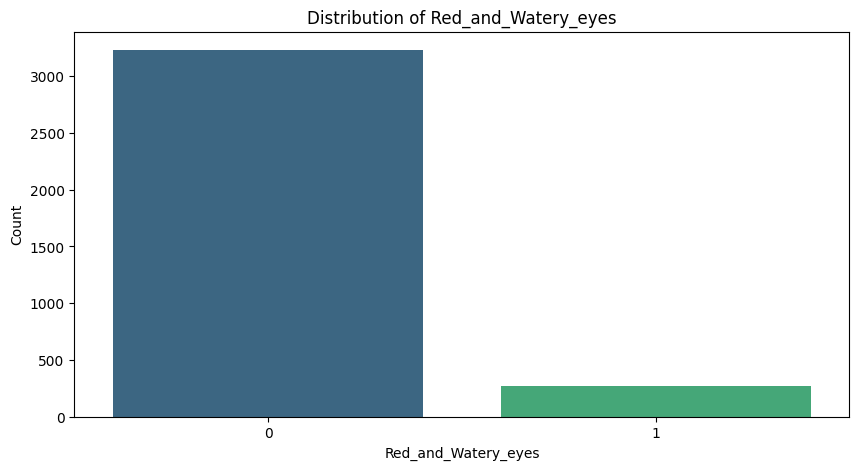

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


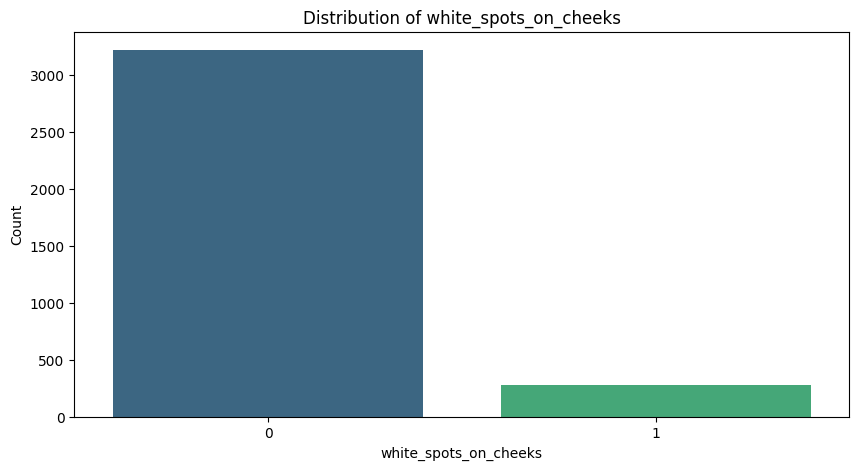

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


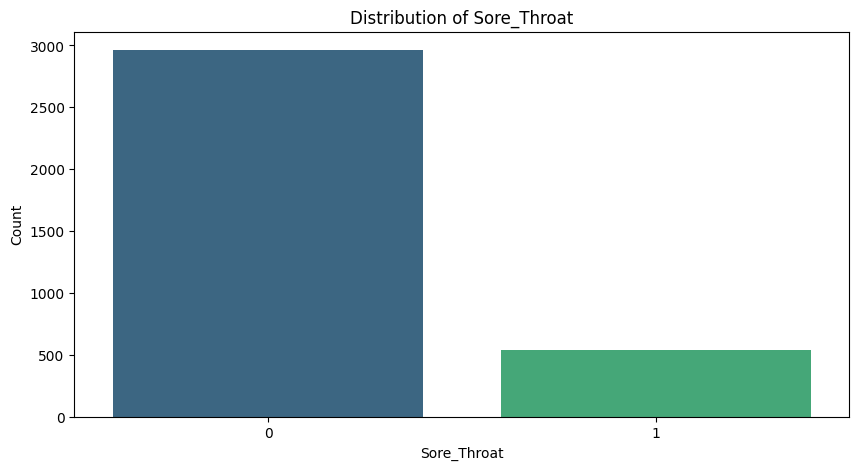

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


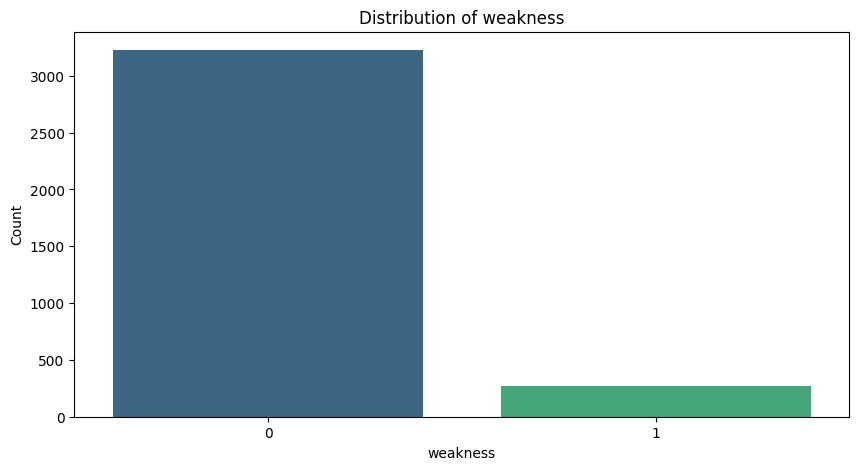

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


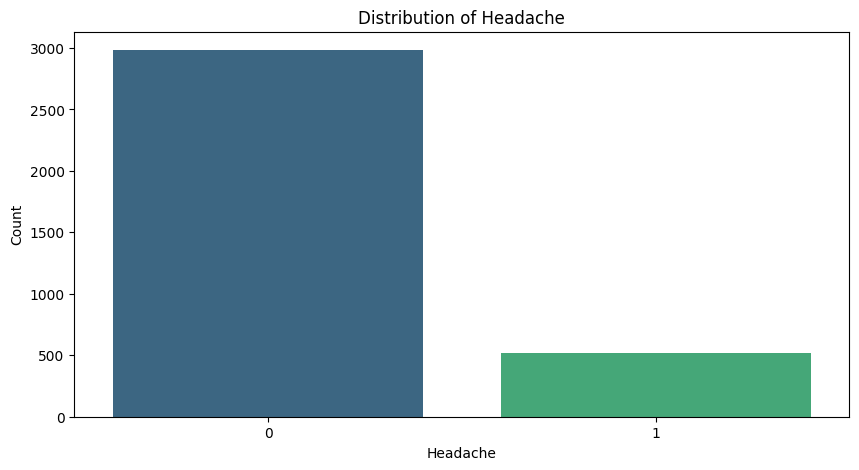

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


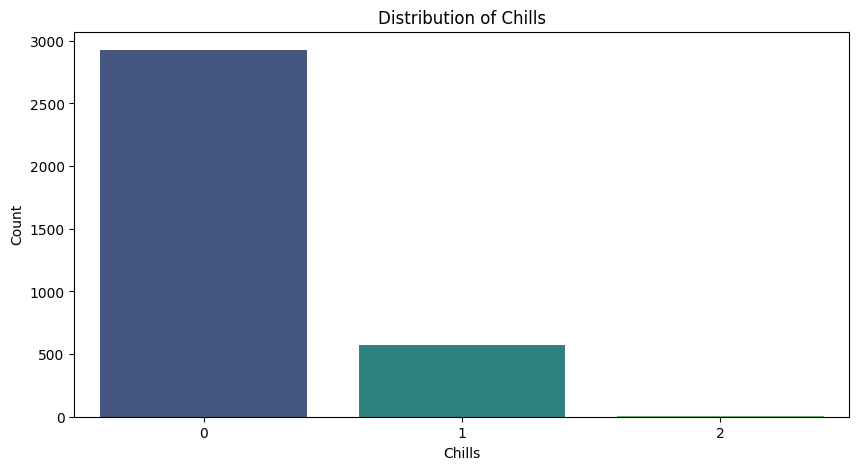

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


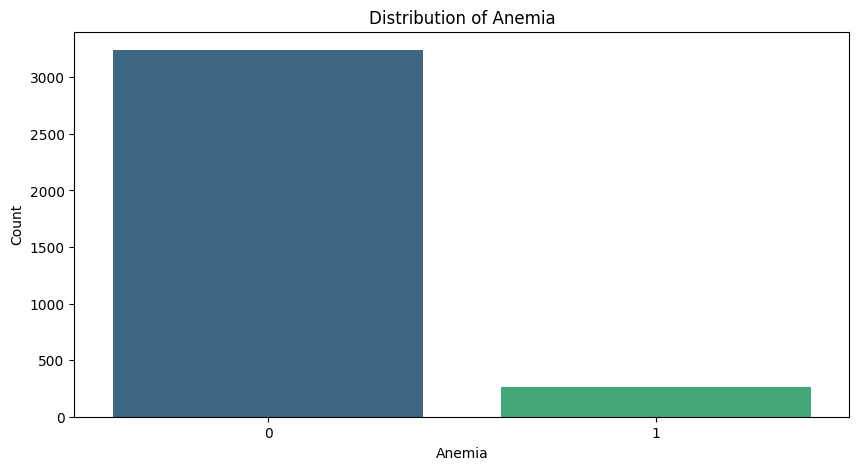

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


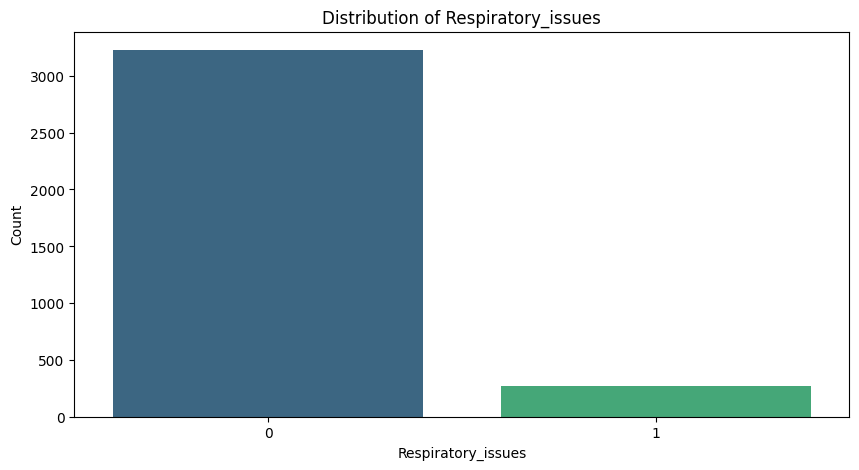

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


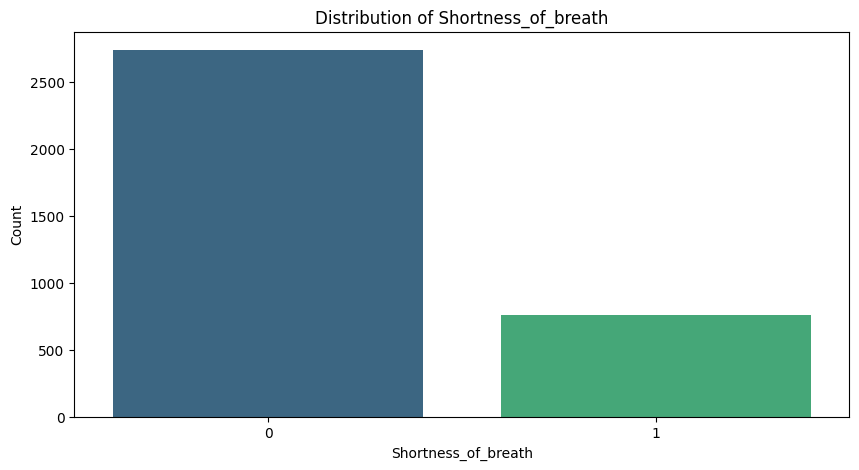

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


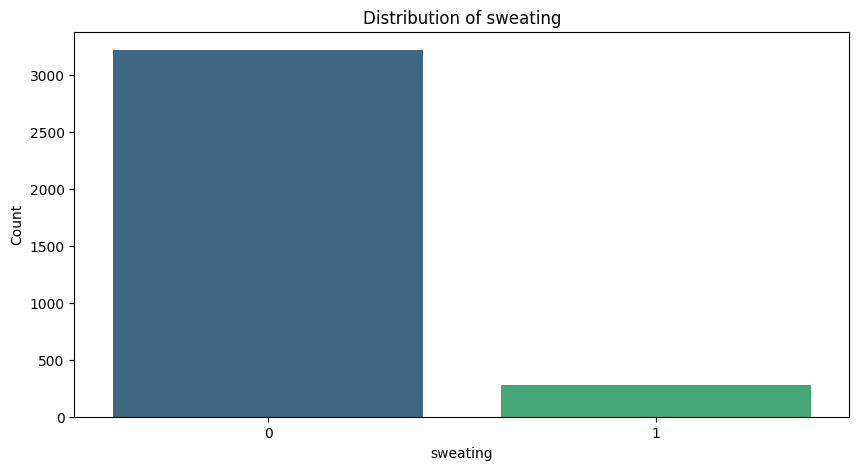

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


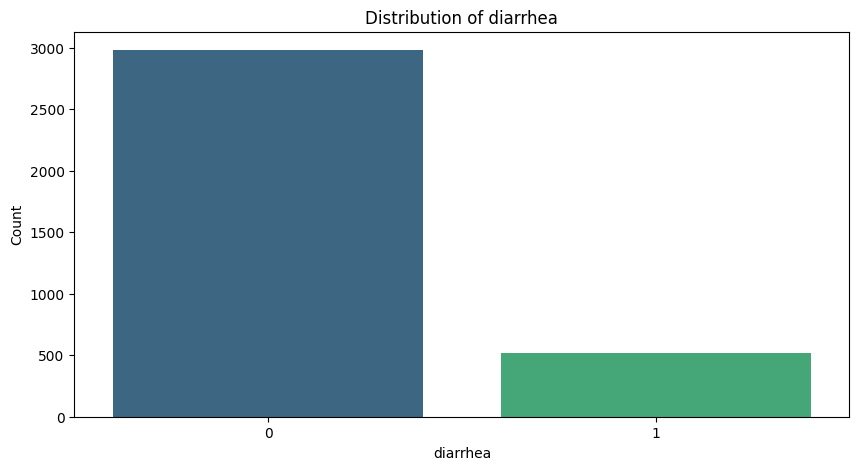

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


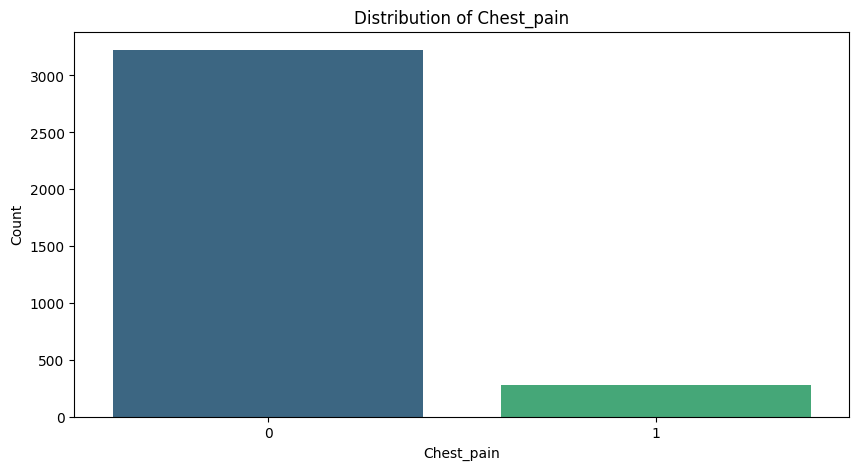

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


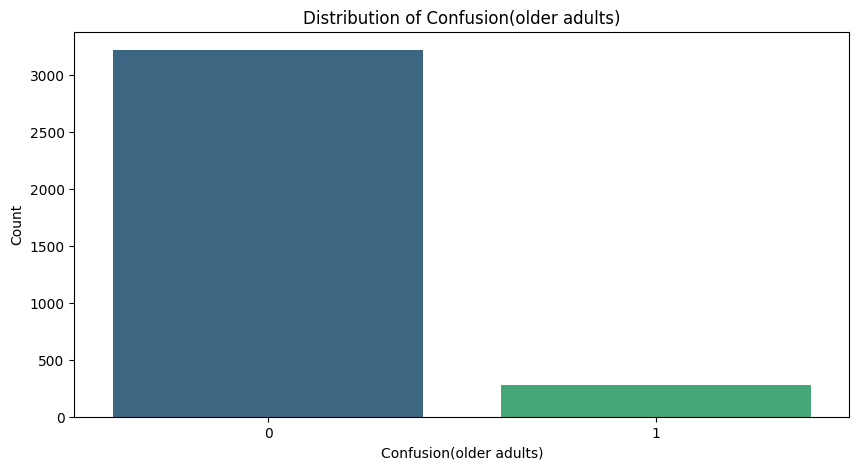

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


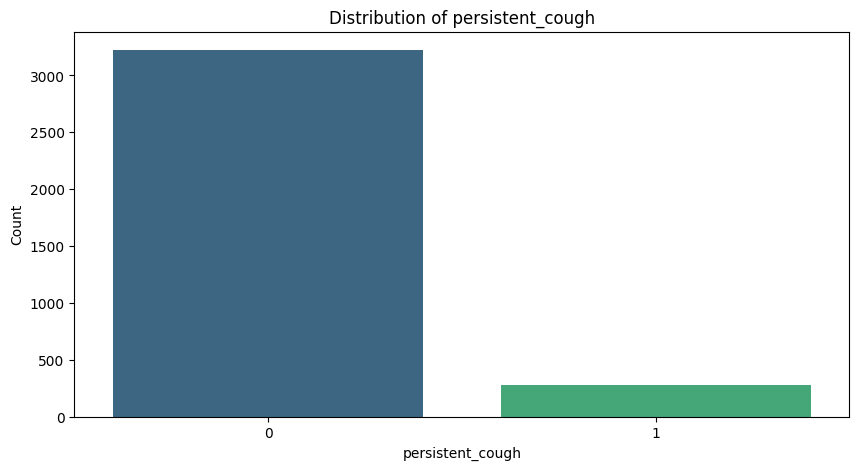

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


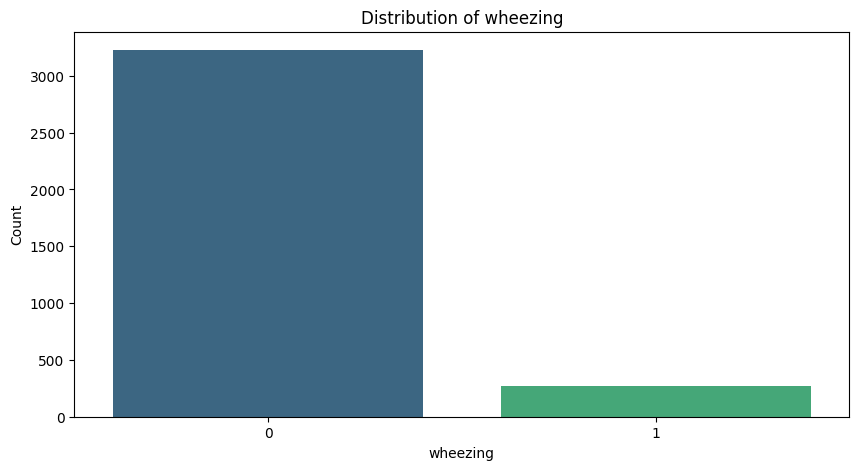

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


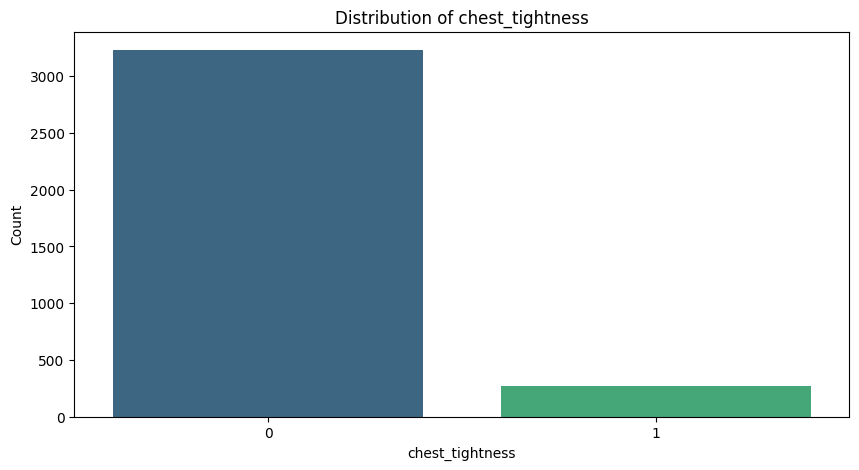

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


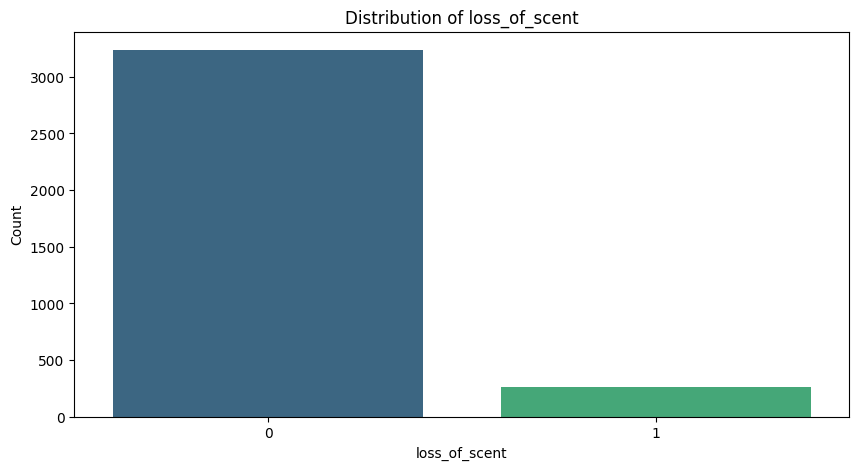

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


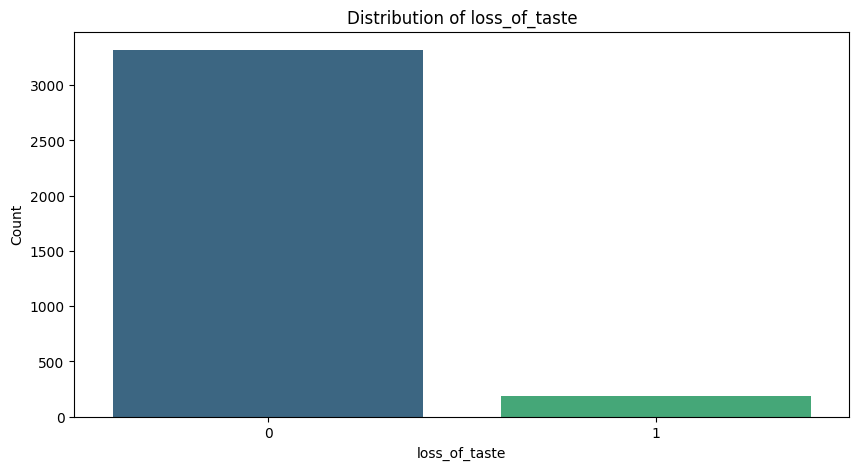

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


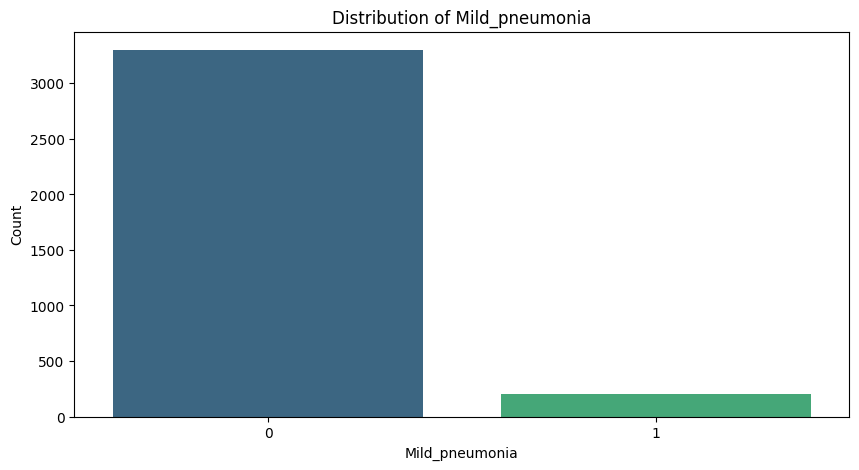

<ipython-input-7-02402a421ab9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=symptom, palette='viridis')


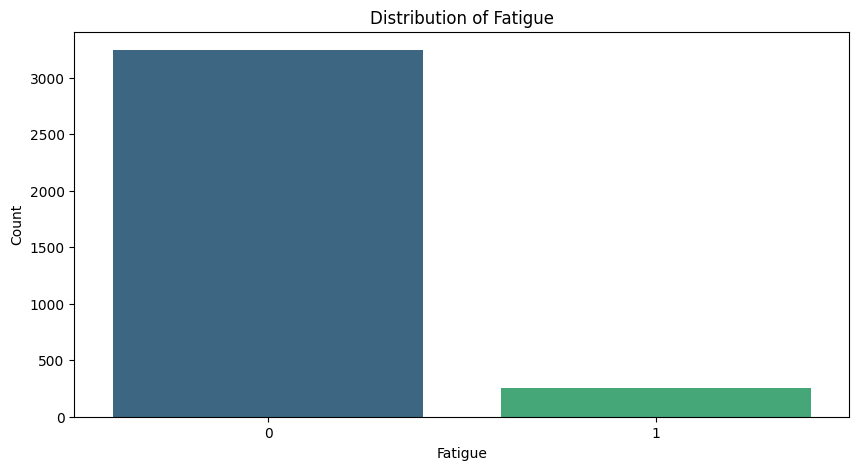

In [ ]:
symptoms = df.columns[:-1]
#symptoms
plt.figure(figsize=(15, 10))
for symptom in symptoms:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=symptom, palette='viridis')
    plt.title(f'Distribution of {symptom}')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    plt.show()

<ipython-input-8-0fd7d1bebb1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='viridis')


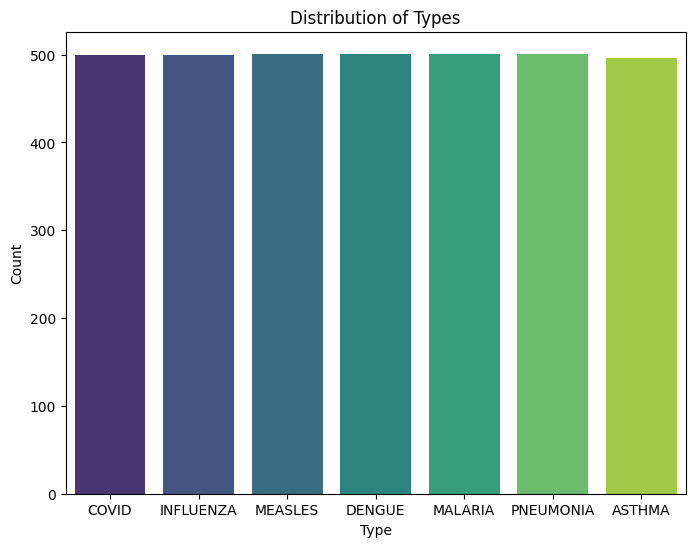

In [ ]:
#class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type', palette='viridis')
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
#feature analysis
symptom_frequencies = df[symptoms].apply(pd.Series.value_counts).fillna(0)

print("Frequency of Symptoms:")
print(symptom_frequencies)

#symptom co-occurrence
co_occurrence = df[symptoms].apply(lambda x: pd.Series(x).value_counts()).fillna(0)

print("\nSymptom Co-occurrence:")
print(co_occurrence)

Frequency of Symptoms:
    Fever  High_fever  severe_headache  pain_behind_eyes  \
0  2455.0      2982.0           3255.0            3229.0   
1  1045.0       518.0            245.0             271.0   
2     0.0         0.0              0.0               0.0   

   joint_and_muscle_pain  Nausea  vomiting  swollen_glands    rash  \
0                 2722.0    2715    3233.0          3235.0  3255.0   
1                  778.0     784     267.0           265.0   245.0   
2                    0.0       1       0.0             0.0     0.0   

   Runny_nose  ...  diarrhea  Chest_pain  Confusion(older adults)  \
0      2979.0  ...    2980.0      3224.0                   3222.0   
1       521.0  ...     520.0       276.0                    278.0   
2         0.0  ...       0.0         0.0                      0.0   

   persistent_cough  wheezing  chest_tightness  loss_of_scent  loss_of_taste  \
0            3223.0    3226.0           3232.0         3237.0         3318.0   
1             277.

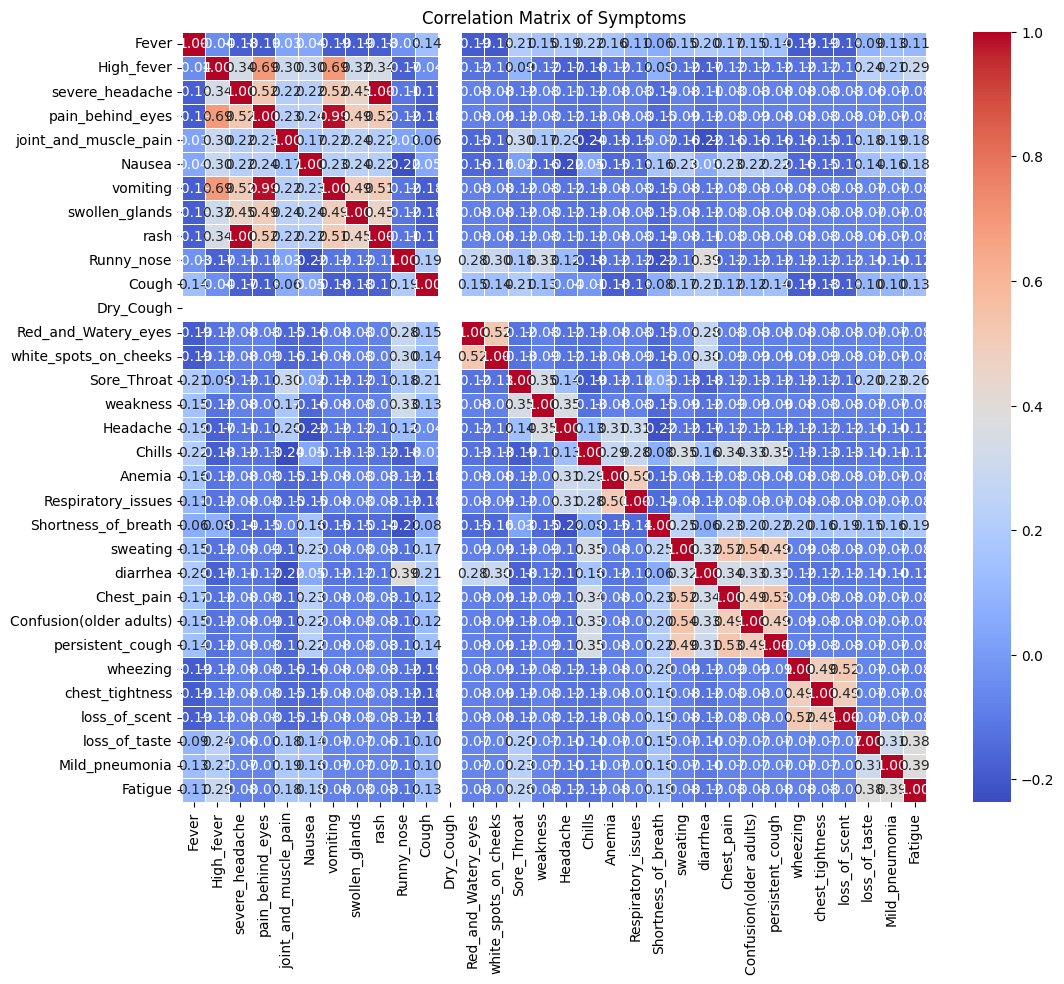

In [ ]:
#correlation analysis
df_binary = df.copy()
df_binary.replace({'Yes': 1, 'No': 0}, inplace=True)

correlation_matrix = df_binary[symptoms].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Symptoms')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier

X = X.apply(pd.to_numeric, errors='coerce')

X = pd.get_dummies(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

results = {'XGBoost': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}}

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # XGBoost
    xgb_clf.fit(X_train, y_train)
    xgb_pred = xgb_clf.predict(X_test)

    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
    xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
    xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

    results['XGBoost']['accuracy'].append(xgb_accuracy)
    results['XGBoost']['precision'].append(xgb_precision)
    results['XGBoost']['recall'].append(xgb_recall)
    results['XGBoost']['f1'].append(xgb_f1)

    print(f"XGBoost - Accuracy: {xgb_accuracy:.2f}, Precision: {xgb_precision:.2f}, Recall: {xgb_recall:.2f}, F1 Score: {xgb_f1:.2f}")

    fold += 1

print("\nAverage Metrics for XGBoost after K-Fold Cross-Validation:")
avg_accuracy = sum(results['XGBoost']['accuracy']) / k
avg_precision = sum(results['XGBoost']['precision']) / k
avg_recall = sum(results['XGBoost']['recall']) / k
avg_f1 = sum(results['XGBoost']['f1']) / k
print(f"XGBoost - Avg Accuracy: {avg_accuracy:.2f}, Avg Precision: {avg_precision:.2f}, Avg Recall: {avg_recall:.2f}, Avg F1 Score: {avg_f1:.2f}")

Fold 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.98, Precision: 0.98, Recall: 0.98, F1 Score: 0.98
Fold 2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1 Score: 0.97
Fold 3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1 Score: 0.97
Fold 4


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.97, Precision: 0.98, Recall: 0.97, F1 Score: 0.97
Fold 5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1 Score: 0.97

Average Metrics for XGBoost after K-Fold Cross-Validation:
XGBoost - Avg Accuracy: 0.97, Avg Precision: 0.97, Avg Recall: 0.97, Avg F1 Score: 0.97


In [ ]:
import numpy as np
import pandas as pd

def predict_custom_input(model, label_encoder, symptom_list):

    input_data = {}

    print("Enter values for each symptom (0 for 'No', 1 for 'Yes'):\n")
    for symptom in symptom_list:
        value = int(input(f"{symptom}: "))
        input_data[symptom] = value


    input_df = pd.DataFrame([input_data])


    input_df = pd.get_dummies(input_df)


    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Predict the output class
    prediction = model.predict(input_df)
    predicted_label = label_encoder.inverse_transform(prediction)

    print("\nPredicted Type:", predicted_label[0])


# Call the function to test the model
predict_custom_input(xgb_clf, label_encoder, symptoms)


Enter values for each symptom (0 for 'No', 1 for 'Yes'):

Fever: 1
High_fever: 1
severe_headache: 1
pain_behind_eyes: 1
joint_and_muscle_pain: 1
Nausea: 1
vomiting: 1
swollen_glands: 1
rash: 1
Runny_nose: 1
Cough: 1
Dry_Cough: 1
Red_and_Watery_eyes: 1
white_spots_on_cheeks: 1
Sore_Throat: 1
weakness: 0
Headache: 0
Chills: 0
Anemia: 0
Respiratory_issues: 1
Shortness_of_breath: 1
sweating: 1
diarrhea: 1
Chest_pain: 1
Confusion(older adults): 1
persistent_cough: 1
wheezing: 1
chest_tightness: 1
loss_of_scent: 1
loss_of_taste: 1
Mild_pneumonia: 1
Fatigue: 1

Predicted Type: PNEUMONIA


In [ ]:
#xgb_clf.save_model('xgb_model.json')

#from google.colab import files
#files.download('xgb_model.json')

In [ ]:
# import joblib
# joblib.dump(label_encoder, 'fypModel.pkl')

# from google.colab import files
# files.download('fypModel.pkl')

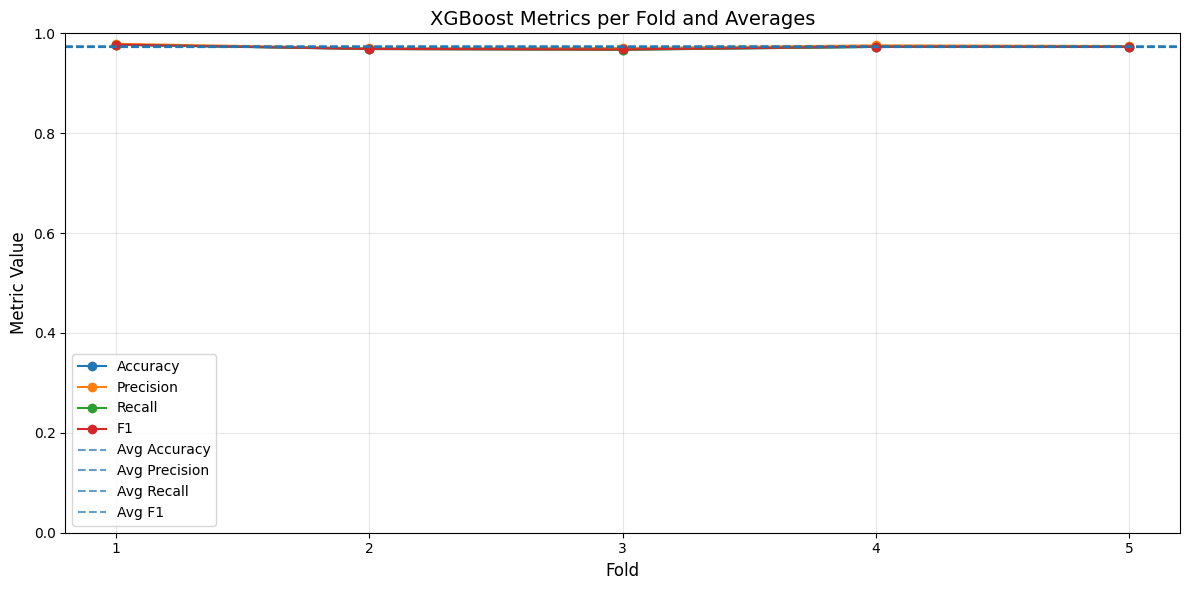

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the metrics from the results dictionary
metrics = ['accuracy', 'precision', 'recall', 'f1']
folds = list(range(1, k + 1))

# Compute average metrics
avg_metrics = {metric: sum(results['XGBoost'][metric]) / k for metric in metrics}

# Plot individual metrics for each fold
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(folds, results['XGBoost'][metric], marker='o', label=f'{metric.capitalize()}')

# Plot the average metrics as a horizontal line
for metric in metrics:
    plt.axhline(y=avg_metrics[metric], linestyle='--', label=f'Avg {metric.capitalize()}', alpha=0.7)

# Customize the plot
plt.title('XGBoost Metrics per Fold and Averages', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(folds)
plt.ylim(0, 1)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()



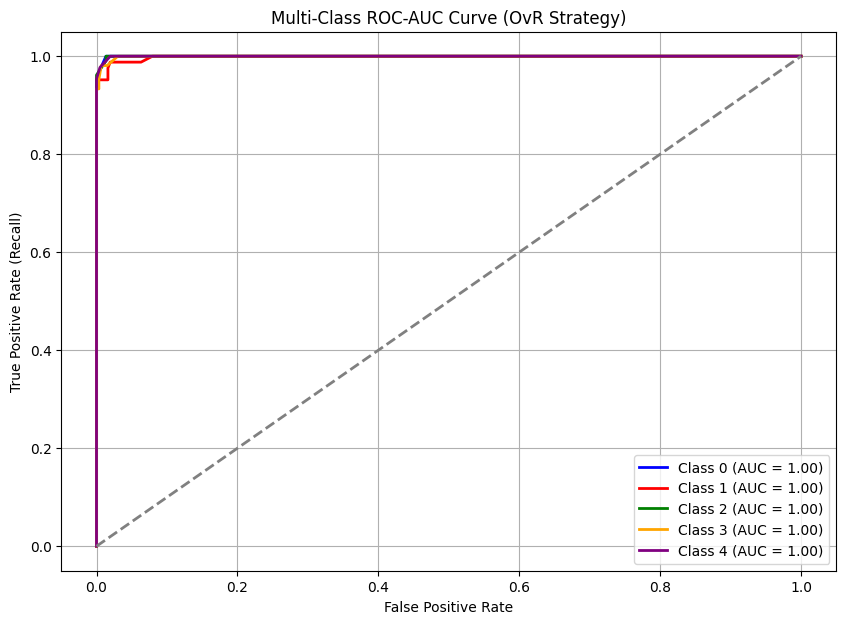

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels for multi-class ROC-AUC calculation
n_classes = len(np.unique(y_encoded))  # Number of classes
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))  # Binarize true labels
y_pred_proba = xgb_clf.predict_proba(X_test)  # Model's predicted probabilities

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC-AUC Curve for each class
plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # For multiple classes

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal (random guessing)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")

# Add titles and labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multi-Class ROC-AUC Curve (OvR Strategy)")
plt.legend(loc="lower right")
plt.grid()
plt.show()
